<a href="https://colab.research.google.com/github/younhuiji/python/blob/main/ml03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine Learning(기계 학습)
    * 지도 학습(Supervised learning): 레이블이 있는 데이터를 학습.
        * 분류(classfication): 클래스를 분류
        * 회귀(regression): 숫자를 예측.
    * 비지도 학습(Unsupervised learning): 레이블이 없는 데이터를 학습.


# 문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 다른 변수(특성)들을 사용해서 예측.

* Perch(농어)의 무게를 길이만으로 예측.
    * Weight(관심변수, 종속변수, 타겟, 레이블) ~ Length(독립 변수, 특성)
* Perch의 무게를 다른 모든 특성들을 사용해서 예측.
    * Weight ~ Length + Diagonal + Height + Width

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline # 변환기와 예측기를 연결해주는 클래스
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression # 선형 회귀를 사용한 숫자 예측
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 회귀 평가 지표들

## 데이터 준비

In [ ]:
# CSV 파일 경로
fish_file = 'https://github.com/JakeOh/202208_itw_java134_lab_python/raw/main/fish.csv'

In [ ]:
# DataFrame 생성
fish_df = pd.read_csv(fish_file)

In [ ]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Perch의 Weight를 Length로 예측.

In [ ]:
perch = fish_df[fish_df.Species == 'Perch']
print(perch)

    Species  Weight  Length  Diagonal   Height   Width
72    Perch     5.9     8.4       8.8   2.1120  1.4080
73    Perch    32.0    13.7      14.7   3.5280  1.9992
74    Perch    40.0    15.0      16.0   3.8240  2.4320
75    Perch    51.5    16.2      17.2   4.5924  2.6316
76    Perch    70.0    17.4      18.5   4.5880  2.9415
77    Perch   100.0    18.0      19.2   5.2224  3.3216
78    Perch    78.0    18.7      19.4   5.1992  3.1234
79    Perch    80.0    19.0      20.2   5.6358  3.0502
80    Perch    85.0    19.6      20.8   5.1376  3.0368
81    Perch    85.0    20.0      21.0   5.0820  2.7720
82    Perch   110.0    21.0      22.5   5.6925  3.5550
83    Perch   115.0    21.0      22.5   5.9175  3.3075
84    Perch   125.0    21.0      22.5   5.6925  3.6675
85    Perch   130.0    21.3      22.8   6.3840  3.5340
86    Perch   120.0    22.0      23.5   6.1100  3.4075
87    Perch   120.0    22.0      23.5   5.6400  3.5250
88    Perch   130.0    22.0      23.5   6.1100  3.5250
89    Perc

In [ ]:
# X: 특성 배열(2d-array), y: 타켓 배열(1d-array)
X = perch[['Length']].values #> (56, 1) shape의 2d-array
y = perch['Weight'].values #> (56, ) shape의 1d-array

In [ ]:
print(X)
print(y)

[[ 8.4]
 [13.7]
 [15. ]
 [16.2]
 [17.4]
 [18. ]
 [18.7]
 [19. ]
 [19.6]
 [20. ]
 [21. ]
 [21. ]
 [21. ]
 [21.3]
 [22. ]
 [22. ]
 [22. ]
 [22. ]
 [22. ]
 [22.5]
 [22.5]
 [22.7]
 [23. ]
 [23.5]
 [24. ]
 [24. ]
 [24.6]
 [25. ]
 [25.6]
 [26.5]
 [27.3]
 [27.5]
 [27.5]
 [27.5]
 [28. ]
 [28.7]
 [30. ]
 [32.8]
 [34.5]
 [35. ]
 [36.5]
 [36. ]
 [37. ]
 [37. ]
 [39. ]
 [39. ]
 [39. ]
 [40. ]
 [40. ]
 [40. ]
 [40. ]
 [42. ]
 [43. ]
 [43. ]
 [43.5]
 [44. ]]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


## train/test split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, 
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

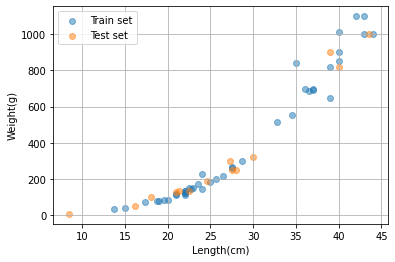

In [ ]:
# Weight ~ Length 시각화. 훈련/테스트 샛의 색깔을 다르게 표현.
plt.scatter(X_tr.flatten(), y_tr, alpha=0.5, label='Train set' )
plt.scatter(X_te.flatten(), y_te, alpha=0.5, label='Test set')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.grid()
plt.show()

## KNN Regressor 모델 훈련, 평가

1. KNN 모델 생성
1. KNN 모델을 훈련 셋으로 훈련
1. 평가
    * 훈련 셋 평가
    * 테스트 셋 평가


In [ ]:
knn_reg = KNeighborsRegressor() # ML 모델 생성

In [ ]:
knn_reg.fit(X_tr, y_tr) # 모델 훈련- 지도 학습

KNeighborsRegressor()

In [ ]:
y_tr_pred = knn_reg.predict(X_tr) 

In [ ]:
print(y_tr_pred) # 훈련 셋의 (무게) 예측값

[  88.6  123.    79.6   70.6  723.   193.   847.   847.  1010.   123.
   95.   123.   174.   248.  1010.   847.   174.   113.   248.   847.
  659.   224.   723.    60.   140.    60.   719.   694.2  248.   167.
  847.   113.   168.   123.  1010.   136.    79.6  719.   123.   193.
  990.   659. ]


In [ ]:
print(y_tr) # 훈련 셋의 (무게) 실젯값

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


KNN(K-Nearest Neighbors) Regressr는 샘플에서 가장 가까운 k개의 훈련 셋의 레이블
(타겟)들의 평균으로 숫자를 예측하는 ML 모델.

In [ ]:
# 첫번째 훈련 샘플에서 가장 가까운 이웃 5개의 인덱스
indices = knn_reg.kneighbors(X_tr[0].reshape(1, -1), return_distance=False)
print(indices)

[[ 0 10 36  2 17]]


In [ ]:
y_tr[indices[0]].mean() # 가장 가까운 이웃 5개의 무게(타겟)들의 평균

88.6

In [ ]:
# 테스트 셋의 예측값
y_te_pred = knn_reg.predict(X_te)
print(y_te_pred)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [ ]:
print(y_te) # 테스트 셋의 실젯값

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


## 회귀 모델 평가 지표

* MAE(Mean Absolute Error): 오차들의 절대값의 평균.
* MSE(Mean Squared Error): 오차들의 제곱의 평균.
* RMSE(Root Mean Squared Error): MSE의 제곱근.
* MAE, MSE, RMSE는 값이 작을 수록 좋은 점수. 값이 작을 수록 더 좋은 회귀 모델.
    * 평가 지표는 일반적으로 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수로 생각.
    * 회귀에서도 오차가 작을 수록 점수가 높아지고, 오차가 클 수록 점수가 낮아지는 평가 지표를 개발 -> R2 score(결정계수)
    * R2 score는 1에 가까울 수록 오차가 작은 모델, 작을 수록 오차가 큰 모델.


* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}} 
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [ ]:
# 훈련 셋 평가 지표들
print('MAE:', mean_absolute_error(y_tr, y_tr_pred))
print('MSE:', mean_squared_error(y_tr, y_tr_pred))
print('RMASE:', np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
print('R2 score:', r2_score(y_tr, y_tr_pred))

MAE: 35.76190476190476
MSE: 3716.5161904761903
RMASE: 60.96323638453089
R2 score: 0.9698823289099254


In [ ]:
# 테스트 셋 평가 지표들
print('MAE:', mean_absolute_error(y_te, y_te_pred))
print('MSE:', mean_squared_error(y_te, y_te_pred))
print('RMASE:', np.sqrt(mean_squared_error(y_te, y_te_pred)))
print('R2 score:', r2_score(y_te, y_te_pred))

MAE: 19.157142857142862
MSE: 721.7385714285714
RMASE: 26.865192562655704
R2 score: 0.992809406101064


In [ ]:
knn_reg.score(X_tr, y_tr) # 훈련 셋 점수 - KNN Regressor의 score 메서드는 결정계수를 리턴.

0.9698823289099254

In [ ]:
knn_reg.score(X_te, y_te) # 결정 계수(R2 score)

0.992809406101064

## 선형 회귀(Linear Regression)


머신 러닝 알골리즘: 

* 사례 기반 학습(instance-based learning):
    * KNN, ...
    * 수학적인 모델을 만들지 않고, 훈련 셋 데이터의 특징들을 사용해서 예측.
    * outlier(이상치)들이 많은 경우에는 성능이 나빠질 수 있음.
* 모델 기반 학습(model-based learning):
    * Linear Regression, LogisticRegression, ...
    * 훈련 셋을 사용해서 수학적인 모델을 만들고, 모델을 사용해서 예측.

In [ ]:
lin_reg = LinearRegression() # ML model 생성

In [ ]:
lin_reg.fit(X_tr, y_tr) # ML model 훈련 셋으로 학습시킴

LinearRegression()

선형 회귀의 학습이란 
$$
 y = a \times x + b 
$$ 수학 모델에서 직선의 기울기(계수) a와 직선의 y절편 b를 찾는 과정.

In [ ]:
lin_reg.coef_ # coefficient: 독립변수 x에 곱해주는 계수(상수)

array([39.01714496])

In [ ]:
lin_reg.intercept_ # y절편: 

-709.0186449535477

$$
Weight = 39 \times Length - 709
$$

In [ ]:
y_tr_pred = lin_reg.predict(X_tr)
print(y_tr_pred)

[  55.71739633  149.35854425   20.60196587  -30.12032259  695.59857374
  266.40997914  851.66715359  812.65000863  968.71858848  149.35854425
   71.32425432  149.35854425  227.39283417  363.95284155  968.71858848
  851.66715359  227.39283417  110.34139928  363.95284155  851.66715359
  570.74370985  324.93569658  715.10714622 -174.48375895  176.67054572
 -123.7614705   734.6157187   656.58142877  410.7734155   207.88426169
  812.65000863  110.34139928  188.37568921  149.35854425 1007.73573345
  168.86711673   32.30710936  734.6157187   149.35854425  289.82026612
  929.70144352  637.07285629]


In [ ]:
39 * X_tr[:5] - 709

array([[ 55.4],
       [149. ],
       [ 20.3],
       [-30.4],
       [695. ]])

In [ ]:
print(y_tr)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [ ]:
mse = mean_squared_error(y_tr, y_tr_pred)
print(mse)
print(np.sqrt(mse))
print(r2_score(y_tr, y_tr_pred))
#> KNN의 결과보다 평균적으로 오차가 더 크다.

7422.953552609781
86.1565641875869
0.939846333997604


In [ ]:
y_te_pred = lin_reg.predict(X_te) # 테스트 셋에서의 예측값

In [ ]:
print(y_te_pred)

[-381.27462726   -6.71003561  363.95284155  122.04654277  168.86711673
  851.66715359  461.49570396  250.80312115  812.65000863  110.34139928
  988.22716096  -76.94089654  383.46141403  356.14941255]


In [ ]:
print(y_te) # 테스트 셋 실젯값(무게)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [ ]:
mse = mean_squared_error(y_te, y_te_pred)
print(mse) # MSE
print(np.sqrt(mse)) # RUSE
print(r2_score(y_te, y_te_pred))

17590.265977889187
132.6283000640858
0.8247503123313558


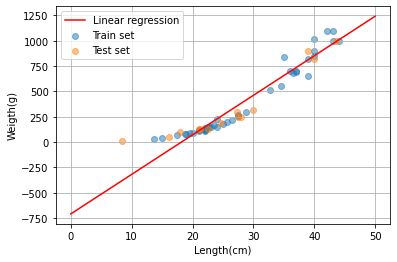

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label='Train set')
# 태스트 셋 산점도
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label='Test set')

# 선형 회귀 모델(직선 y = ax + b) 시각화
xs = np.arange(0, 50, 0.01)
a = lin_reg.coef_[0]
b = lin_reg.intercept_
ys = a * xs + b
plt.plot(xs, ys, 'r-', label='Linear regression')

plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weigth(g)')
plt.show()

## 2차항을 포함하는 선형 회귀

In [ ]:
X_tr[:5] # 훈련 셋에서 첫 5마리 물고기의 길이()

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [ ]:
X_tr_poly = np.c_[X_tr ** 2, X_tr]
X_tr_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

Scikit-Learn 패키지의 클래스:

* 변환기(transformer)
    * StandardScaler, MinMaxScaler, PolynominalFeature, ...
    * fit, transform, fit_transform 메서드를 가지고 있음.
* 예측기(estimator)
    * 머신 러닝 알고리즘 클래스: KNeighborsClassifier, KNeighborsRegressor, ...
    * fit, predict, score 메서드를 가지고 있음.
    

PolynominalFeatures 클래스를 사용한 다차항 추가

In [ ]:
poly_features = PolynomialFeatures(include_bias=False)
X_tr_poly = poly_features.fit_transform(X_tr)
X_tr_poly[:5]

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [ ]:
X_te_poly = poly_features.transform(X_te)
X_te_poly[:5]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25],
       [ 21.3 , 453.69],
       [ 22.5 , 506.25]])

In [ ]:
lin_reg = LinearRegression() # 모델 생성
lin_reg.fit(X_tr_poly, y_tr) # 모델 훈련

LinearRegression()

In [ ]:
coefs = lin_reg.coef_ # 1, 2차항에 곱해지는 계수들
print(coefs)

[-21.55792498   1.01433211]


In [ ]:
intercept = lin_reg.intercept_ # y절편(y축과 만나는 점)
print(intercept)

116.05021078278395


2차항을 포함하는 선형 회귀 모델의 학습 결과:
$$
y = w_0 + w_1 \times x + w_2 \times x^2 
$$

In [ ]:
y_tr_pred = lin_reg.predict(X_tr_poly) # 훈련 셋 예측값

In [ ]:
print(y_tr_pred)

[  83.18070434  132.71260219   67.61880901   48.04150559  654.5393253
  211.05965467  876.66458663  818.09027497 1064.55950693  132.71260219
   90.62455496  132.71260219  182.91530629  290.29593158 1064.55950693
  876.66458663  182.91530629  110.65424646  290.29593158  876.66458663
  500.20932803  257.07992265  680.52990177   11.08663218  149.3605064
   20.90606071  707.0276443   604.07967051  332.83297906  169.60388118
  818.09027497  110.65424646  156.79962213  132.71260219 1131.24847547
  144.50252913   72.62352767  707.0276443   132.71260219  228.92002253
  999.89920261  579.6105922 ]


In [ ]:
print(y_tr)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [ ]:
mse = mean_squared_error(y_tr, y_tr_pred)
print(mse)
print(np.sqrt(mse))
print(r2_score(y_tr, y_tr_pred))

3617.991740363965
60.14974430838393
0.9706807451768623


In [ ]:
# 테스트 셋 평가
y_te_pred = lin_reg.predict(X_te_poly) # 테스트 셋 예측값
mse = mean_squared_error(y_te, y_te_pred)
print(mse)
print(np.sqrt(mse))
print(r2_score(y_te, y_te_pred))

2248.9974694392668
47.42359612512812
0.9775935108325122


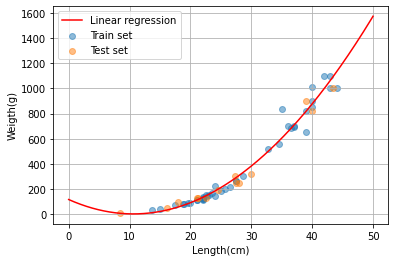

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label='Train set')
# 태스트 셋 산점도
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label='Test set')

# 선형 회귀 모델(직선 y = w0 + w1 * x + w2 * x^2) 시각화
xs = np.arange(0, 50, 0.001)
ys = intercept + coefs[0] * xs + coefs[1] * (xs **2 )
plt.plot(xs, ys, 'r-', label='Linear regression')

plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weigth(g)')
plt.show()

# 모든 특성을 사용한 선형 회귀

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
X = perch.iloc[:, 2:].values

In [ ]:
y = perch['Weight'].values

In [ ]:
X[:5]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [ ]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

## Train/Test Split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

## KNN

In [ ]:
knn = KNeighborsRegressor() # 모델 생성
knn.fit(X_tr, y_tr) # 모델 훈련

KNeighborsRegressor()

In [ ]:
y_tr_pred = knn.predict(X_tr) # 훈련 셋 예측값

In [ ]:
mse = mean_squared_error(y_tr, y_tr_pred)
print('RMSE:', np.sqrt(mse)) 

RMSE: 54.64954145235237


In [ ]:
print('Train R2 score:', r2_score(y_tr, y_tr_pred))

Train R2 score: 0.97579760182756


In [ ]:
y_te_pred = knn.predict(X_te) # 테스트 셋 예측값

In [ ]:
test_mse = mean_squared_error(y_te, y_te_pred)

In [ ]:
print('Test RMSE: ', np.sqrt(test_mse))

Test RMSE:  28.93630937075425


In [ ]:
print('Test R2 score:', r2_score(y_te, y_te_pred))

Test R2 score: 0.9916579819676246


* 과대적합(overfitting): 훈련 셋의 점수가 테스트 셋의 점수보다 훨씬 좋은 경우. 
    * 일반적으로 과대적합이 나타남.
    * 과대적합의 크기를 줄여주는 것이 머신 러닝의 목적 중 하나.
* 과소적합(underfitting): 훈련 셋의 점수가 테스트 셋의 점수보다 나쁜 경우.
    * 일반적으로 과소적합은 흔히 나타나지 않음.
    * 훈련/테스트 셋의 샘플 개수가 적으면 과소적합이 나타나기도 함.
    * 데이터를 더 수집해서 샘플 개수를 늘려야 함.

## 1차항만 고려한 선형 회귀


In [ ]:
lin_reg = LinearRegression() # 모델 생성
lin_reg.fit(X_tr, y_tr) # 모델 훈련

LinearRegression()

In [ ]:
lin_reg.coef_

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [ ]:
lin_reg.intercept_

-610.0275364260515

In [ ]:
y_tr_pred = lin_reg.predict(X_tr)

In [ ]:
mse = mean_squared_error(y_tr, y_tr_pred)
print('Train RMSE:', np.sqrt(mse))
print('Train R2 score:', r2_score(y_tr, y_tr_pred))

Train RMSE: 73.07651173088372
Train R2 score: 0.9567246116638569


KNN의 훈련 점수보다 나쁨

In [ ]:
y_te_pred = lin_reg.predict(X_te)
test_mse = mean_squared_error(y_te, y_te_pred)
print('Test RMSE:', np.sqrt(test_mse))
print('Test R2 score:', r2_score(y_te, y_te_pred))

Test RMSE: 110.183531090199
Test R2 score: 0.8790465615990273


KNN의 테스트 점수보다 나쁨

## 2차항까지 고려한 선형 회귀

Piepeline = 변환기1 + 변환기2 + ... + 예측기

In [ ]:
poly_features = PolynomialFeatures(include_bias=False) # 2차항을 추가하는 변환기
lin_reg = LinearRegression() # 선형 회귀 모델 

# PolynomialReatures + LinearRegression ==> Pipeline 
pipe = Pipeline([('poly', poly_features),
                 ('reg', lin_reg)])

In [ ]:
pipe

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [ ]:
pipe.fit(X_tr, y_tr) # 모델 훈련
# pipe 내부: (1) poly.fit_transform(X_tr), (2) reg.fit(X_tr변환)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [ ]:
pipe['reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [ ]:
pipe['poly']

PolynomialFeatures(include_bias=False)

In [ ]:
pipe['reg'].intercept_

67.36628210088094

In [ ]:
print('Train R2 score: ', pipe.score(X_tr, y_tr))

Train R2 score:  0.9920055538341062


In [ ]:
print('Test R2 score: ', pipe.score(X_te, y_te))

Test R2 score:  0.9492609601552375
